In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 15})

#G=Goal, OG=Own Goal, Y=Yellow Card, R=Red Card, SY = Red Card by second yellow, P=Penalty, MP=Missed Penalty, I = Substitution In, O=Substitute Out, IH= In half time?

df_matches = pd.read_csv('data_raw/WorldCupMatches.csv', sep=',')
df_players = pd.read_csv('data_raw/WorldCupPlayers.csv', sep=',')
df_cups = pd.read_csv('data_raw/WorldCups.csv', sep=',')

df_events = pd.read_csv('data_prepared/event.csv', sep=',').replace(np.nan, '', regex=True)
df_penalties = pd.read_csv('data_prepared/penalties.csv', encoding='iso-8859-1', sep=',')

In [17]:
df_events

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,...,GoldenGoal,DecisionPenaltyAway,DecisionPenaltyHome,HomeTeamWins,AwayTeamWins,EventOfHomeTeam,EventOfWinner,EventOfLoser,HourGameStart,StageRank
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444,...,False,0,0,True,False,True,True,False,15,1
1,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444,...,False,0,0,True,False,False,False,True,15,1
2,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444,...,False,0,0,True,False,True,True,False,15,1
3,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444,...,False,0,0,True,False,False,False,True,15,1
4,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444,...,False,0,0,True,False,True,True,False,15,1
5,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444,...,False,0,0,True,False,False,False,True,15,1
6,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444,...,False,0,0,True,False,True,True,False,15,1
7,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444,...,False,0,0,True,False,True,True,False,15,1
8,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444,...,False,0,0,True,False,False,False,True,15,1
9,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444,...,False,0,0,True,False,True,True,False,15,1


# When is a match winner decided?

In [18]:
# data preparation: event data since 1986
df_relevant_events=df_events.loc[(df_events['Year'] >= 1986)]


In [31]:
df_relevant_events

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,...,GoldenGoal,DecisionPenaltyAway,DecisionPenaltyHome,HomeTeamWins,AwayTeamWins,EventOfHomeTeam,EventOfWinner,EventOfLoser,HourGameStart,StageRank
15960,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,True,False,False,12,1
15961,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,False,False,False,12,1
15962,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,True,False,False,12,1
15963,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,False,False,False,12,1
15964,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,True,False,False,12,1
15965,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,False,False,False,12,1
15966,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,True,False,False,12,1
15967,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,False,False,False,12,1
15968,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,True,False,False,12,1
15969,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,False,False,False,12,1


In [33]:
df_relevant_events = df_relevant_events.groupby(["MatchID"]).mean()

In [27]:
# df_goals_by_minute = df_relevant_events[(df_relevant_events.EventType.str.contains("G") == True) | (df_relevant_events.EventType.str.contains("OG") == True) | (df_relevant_events.EventType.str.contains("P") == True) & (df_relevant_events.EventType.str.contains("MP") == False)]
# df_goals_by_minute
# (df_relevant_events.Penalty == True)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,...,GoldenGoal,DecisionPenaltyAway,DecisionPenaltyHome,HomeTeamWins,AwayTeamWins,EventOfHomeTeam,EventOfWinner,EventOfLoser,HourGameStart,StageRank
15962,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,True,False,False,12,1
15979,1986,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1,1,Italy,96000,...,False,0,0,False,False,False,False,False,12,1
16023,1986,01 Jun 1986 - 16:00,Group C,Nou Camp - Estadio Le�n,Leon,Canada,0,1,France,65500,...,False,0,0,False,True,False,True,False,16,1
16067,1986,01 Jun 1986 - 12:00,Group D,Jalisco,Guadalajara,Spain,0,1,Brazil,35748,...,False,0,0,False,True,False,True,False,12,1
16098,1986,02 Jun 1986 - 12:00,Group C,Estadio Irapuato,Irapuato,Soviet Union,6,0,Hungary,16500,...,False,0,0,True,False,True,True,False,12,1
16100,1986,02 Jun 1986 - 12:00,Group C,Estadio Irapuato,Irapuato,Soviet Union,6,0,Hungary,16500,...,False,0,0,True,False,True,True,False,12,1
16109,1986,02 Jun 1986 - 12:00,Group C,Estadio Irapuato,Irapuato,Soviet Union,6,0,Hungary,16500,...,False,0,0,True,False,True,True,False,12,1
16112,1986,02 Jun 1986 - 12:00,Group C,Estadio Irapuato,Irapuato,Soviet Union,6,0,Hungary,16500,...,False,0,0,True,False,True,True,False,12,1
16130,1986,02 Jun 1986 - 12:00,Group C,Estadio Irapuato,Irapuato,Soviet Union,6,0,Hungary,16500,...,False,0,0,True,False,True,True,False,12,1
16150,1986,02 Jun 1986 - 12:00,Group A,Estadio Ol�mpico Universitario,Mexico City,Argentina,3,1,Korea Republic,60000,...,False,0,0,True,False,False,False,True,12,1


In [34]:
df_relevant_events

,Year,Home Team Goals,Away Team Goals,Half-time Home Goals,Half-time Away Goals,RoundID,Shirt Number,ExtraTime,Penalty,GoldenGoal,DecisionPenaltyAway,DecisionPenaltyHome,HomeTeamWins,AwayTeamWins,EventOfHomeTeam,EventOfWinner,EventOfLoser,HourGameStart,StageRank
MatchID,,,,,,,,,,,,,,,,,,,
25,1990.0,0.0,1.0,0.0,0.0,323.0,11.478261,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,0.500000,0.500000,17.0,2.0
26,1990.0,0.0,1.0,0.0,0.0,322.0,11.456522,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,0.500000,0.500000,18.0,1.0
27,1990.0,1.0,0.0,0.0,0.0,3462.0,11.297872,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.468085,0.468085,0.531915,20.0,6.0
28,1990.0,1.0,1.0,0.0,0.0,3464.0,11.160000,1.0,1.0,0.0,4.0,3.0,0.0,1.0,0.460000,0.540000,0.460000,20.0,4.0
29,1990.0,1.0,1.0,0.0,0.0,322.0,11.413043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,0.000000,21.0,1.0
30,1990.0,2.0,0.0,1.0,0.0,322.0,11.478261,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.521739,0.521739,0.478261,21.0,1.0
31,1990.0,0.0,0.0,0.0,0.0,751.0,11.666667,1.0,1.0,0.0,3.0,2.0,0.0,1.0,0.479167,0.520833,0.479167,17.0,3.0
42,1990.0,1.0,0.0,0.0,0.0,322.0,11.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.511111,0.511111,0.488889,21.0,1.0
43,1990.0,0.0,1.0,0.0,1.0,322.0,11.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,0.500000,0.500000,17.0,1.0


In [48]:
first_half_decided_group = 0
second_half_decided_group = 0
first_half_decided = 0
second_half_decided = 0
extra_time_decided = 0
penalty_decided = 0

for index, row in df_relevant_events.iterrows():
    if row["Home Team Goals"] == row["Half-time Home Goals"] and row["Away Team Goals"] == row["Half-time Away Goals"] and row["Penalty"] == False:
        if row["StageRank"] > 1:
            first_half_decided+=1
        else:
            first_half_decided_group+=1
        continue
    if row["ExtraTime"] == True and row["Penalty"] == False:
        extra_time_decided+=1
        continue
    if row["Penalty"] == True:
        penalty_decided+=1
        continue
    if row["StageRank"] > 1:
        second_half_decided+=1
    else:
        second_half_decided_group+=1

## KO phase

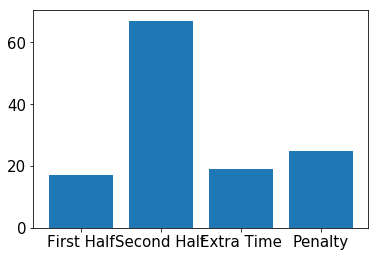

In [49]:
match_decisions = [first_half_decided, second_half_decided, extra_time_decided, penalty_decided]
match_axis = ["First Half", "Second Half", "Extra Time", "Penalty"]
plt.bar(x = match_axis, height = match_decisions)

plt.show()

## Group phase

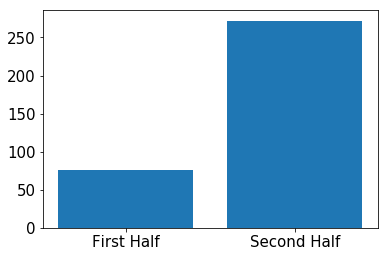

In [86]:
match_decisions = [first_half_decided_group, second_half_decided_group]
match_axis = ["First Half", "Second Half"]
plt.bar(x = match_axis, height = match_decisions)

plt.show()

# Erfolgsquote von Strafstößen

In [87]:
df_penalties_success_rate = df_events[(df_events.EventType.str.contains("P") == True)]
df_penalties_success_rate

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,...,GoldenGoal,DecisionPenaltyAway,DecisionPenaltyHome,HomeTeamWins,AwayTeamWins,EventOfHomeTeam,EventOfWinner,EventOfLoser,HourGameStart,StageRank
397,1930,19 Jul 1930 - 15:00,Group 1,Estadio Centenario,Montevideo,Argentina,6,3,Mexico,42100,...,False,0,0,True,False,False,False,True,15,1
725,1934,27 May 1934 - 16:30,Preliminary round,Stadio Benito Mussolini,Turin,Austria,3,2,France,16000,...,False,0,0,True,False,False,False,True,16,0
929,1934,27 May 1934 - 16:30,Preliminary round,Luigi Ferraris,Genoa,Spain,3,1,Brazil,21000,...,False,0,0,True,False,True,True,False,16,0
1169,1934,31 May 1934 - 16:30,Quarter-finals,Littorale,Bologna,Austria,2,1,Hungary,23000,...,False,0,0,True,False,False,False,True,16,3
1641,1938,05 Jun 1938 - 17:30,First round,Stade de la Meinau,Strasbourg,Brazil,6,5,Poland,13452,...,False,0,0,True,False,False,False,True,17,2
1826,1938,12 Jun 1938 - 17:00,Quarter-finals,Stade du Parc Lescure,Bordeaux,Brazil,1,1,Czechoslovakia,22021,...,False,0,0,False,False,False,False,False,17,3
2082,1938,16 Jun 1938 - 18:00,Semi-finals,Stade V�lodrome,Marseilles,Italy,2,1,Brazil,33000,...,False,0,0,True,False,True,True,False,18,4
2466,1950,28 Jun 1950 - 15:00,Group 1,Eucaliptos,Porto Alegre,Yugoslavia,4,1,Mexico,11078,...,False,0,0,True,False,False,False,True,15,1
2847,1950,02 Jul 1950 - 15:00,Group 2,Ilha do Retiro,Recife,Chile,5,2,USA,8501,...,False,0,0,True,False,False,False,True,15,1
2933,1950,09 Jul 1950 - 15:00,Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,7,1,Sweden,138886,...,False,0,0,True,False,False,False,True,15,1


In [88]:
f = {
     'EventType':'count'
    }

df_penalties_success_rate = df_penalties_success_rate[["EventType"]].groupby(["EventType"]).agg(f)

In [89]:
df_penalties_success_rate

,EventType
EventType,
MP,11
P,178


In [90]:
df_penalties_MP = df_penalties_success_rate.loc["MP"]
# df_penalties_P = df_penalties_success_rate.loc["P"]

In [91]:
df_penalties_P = df_penalties_success_rate.loc["P"]

In [92]:
df_penalties_MP

EventType    11
Name: MP, dtype: int64

In [93]:
df_penalties_P

EventType    178
Name: P, dtype: int64

In [99]:
df_penalty_quote = print(float(df_penalties_MP) / df_penalties_P)


EventType    0.061798
Name: P, dtype: float64


## Antwort: Nur 6,17 % der Strafstöße werden verschossen

# Wie oft hat sich ein zurückliegendes Team den Sieg geholt?

In [105]:
ht_wins_after_residual = 0
at_wins_after_residual = 0
halftime_tie = 0
regular_time_tie = 0
leading_team_wins = 0

df_grouped_events = df_events.groupby(["MatchID"]).mean()

for index, row in df_grouped_events.iterrows():
    # ignore penalties and extra time
    if row["Penalty"] == True or row["ExtraTime"] == True:
        continue
    if row["Half-time Home Goals"] == row["Half-time Away Goals"]:
        halftime_tie+=1
        continue
    if row["Home Team Goals"] == row["Away Team Goals"]:
        regular_time_tie +=1
        continue
    if row["Half-time Home Goals"] > row["Half-time Away Goals"] and row["Home Team Goals"] < row["Away Team Goals"]:
        at_wins_after_residual+=1
        continue
    if row["Half-time Home Goals"] < row["Half-time Away Goals"] and row["Home Team Goals"] > row["Away Team Goals"]:
        ht_wins_after_residual+=1
        continue  
    leading_team_wins+=1
    

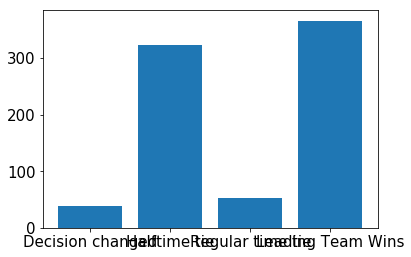

In [106]:
decision_changed_after_ht = ht_wins_after_residual + at_wins_after_residual
y = [decision_changed_after_ht, halftime_tie, regular_time_tie, leading_team_wins]
x = ["Decision changed", "Halftime tie", "Regular time tie", "Leading Team Wins"]
plt.bar(x = x, height = y)

plt.show()

In [107]:
total_matches = decision_changed_after_ht + halftime_tie + regular_time_tie + leading_team_wins

In [109]:
decision_changed_after_ht

38

In [108]:
total_matches

779

## Antwort: Von knapp 780 Spielen werden weniger als 40 Spiele gedreht

### Hier wird nicht berücksichtigt: Spiele mit Elfmeterschießen oder Nachspielzeit und es wird nicht zwischen Gruppen- und KO-Phase unterschieden

# Vorhersage, zu welcher Spielphase sich ein Spiel entscheidet

In [117]:
# data prep
df_relevant_events # events since 1986
df_relevant_events = df_relevant_events.groupby(["MatchID"]).mean()
df_relevant_events

,Year,Home Team Goals,Away Team Goals,Half-time Home Goals,Half-time Away Goals,RoundID,Shirt Number,ExtraTime,Penalty,GoldenGoal,DecisionPenaltyAway,DecisionPenaltyHome,HomeTeamWins,AwayTeamWins,EventOfHomeTeam,EventOfWinner,EventOfLoser,HourGameStart,StageRank
MatchID,,,,,,,,,,,,,,,,,,,
25,1990.0,0.0,1.0,0.0,0.0,323.0,11.478261,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,0.500000,0.500000,17.0,2.0
26,1990.0,0.0,1.0,0.0,0.0,322.0,11.456522,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,0.500000,0.500000,18.0,1.0
27,1990.0,1.0,0.0,0.0,0.0,3462.0,11.297872,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.468085,0.468085,0.531915,20.0,6.0
28,1990.0,1.0,1.0,0.0,0.0,3464.0,11.160000,1.0,1.0,0.0,4.0,3.0,0.0,1.0,0.460000,0.540000,0.460000,20.0,4.0
29,1990.0,1.0,1.0,0.0,0.0,322.0,11.413043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,0.000000,21.0,1.0
30,1990.0,2.0,0.0,1.0,0.0,322.0,11.478261,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.521739,0.521739,0.478261,21.0,1.0
31,1990.0,0.0,0.0,0.0,0.0,751.0,11.666667,1.0,1.0,0.0,3.0,2.0,0.0,1.0,0.479167,0.520833,0.479167,17.0,3.0
42,1990.0,1.0,0.0,0.0,0.0,322.0,11.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.511111,0.511111,0.488889,21.0,1.0
43,1990.0,0.0,1.0,0.0,1.0,322.0,11.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,0.500000,0.500000,17.0,1.0


In [125]:
# lambda function
def calculateDecisionPhase(x):
    if x["Home Team Goals"] == x["Half-time Home Goals"] and x["Away Team Goals"] == x["Half-time Away Goals"] and x["Penalty"] == False:
        if x["Home Team Goals"] == x["Away Team Goals"]:
            return 0
        else:
            return 1
    if x["ExtraTime"] == True and x["Penalty"] == False:
        return 3
    if x["Penalty"] == True:
        return 4
    return 2

In [130]:
def calculateWorldCupStage(x):
    if x["StageRank"] == 1:
        return 0 # group phase
    return 1 # ko phase

In [131]:
df_relevant_events_truth = df_relevant_events
df_relevant_events_truth["DecisionPhase"] = df_relevant_events_truth.apply(calculateDecisionPhase, axis=1)
df_relevant_events_truth["WorldCupStage"] = df_relevant_events_truth.apply(calculateWorldCupStage, axis=1)

df_relevant_events_truth

,Year,Home Team Goals,Away Team Goals,Half-time Home Goals,Half-time Away Goals,RoundID,Shirt Number,ExtraTime,Penalty,GoldenGoal,...,DecisionPenaltyHome,HomeTeamWins,AwayTeamWins,EventOfHomeTeam,EventOfWinner,EventOfLoser,HourGameStart,StageRank,DecisionPhase,WorldCupStage
MatchID,,,,,,,,,,,,,,,,,,,,,
25,1990.0,0.0,1.0,0.0,0.0,323.0,11.478261,0.0,0.0,0.0,...,0.0,0.0,1.0,0.500000,0.500000,0.500000,17.0,2.0,2,1
26,1990.0,0.0,1.0,0.0,0.0,322.0,11.456522,0.0,0.0,0.0,...,0.0,0.0,1.0,0.500000,0.500000,0.500000,18.0,1.0,2,0
27,1990.0,1.0,0.0,0.0,0.0,3462.0,11.297872,0.0,0.0,0.0,...,0.0,1.0,0.0,0.468085,0.468085,0.531915,20.0,6.0,2,1
28,1990.0,1.0,1.0,0.0,0.0,3464.0,11.160000,1.0,1.0,0.0,...,3.0,0.0,1.0,0.460000,0.540000,0.460000,20.0,4.0,4,1
29,1990.0,1.0,1.0,0.0,0.0,322.0,11.413043,0.0,0.0,0.0,...,0.0,0.0,0.0,0.500000,0.000000,0.000000,21.0,1.0,2,0
30,1990.0,2.0,0.0,1.0,0.0,322.0,11.478261,0.0,0.0,0.0,...,0.0,1.0,0.0,0.521739,0.521739,0.478261,21.0,1.0,2,0
31,1990.0,0.0,0.0,0.0,0.0,751.0,11.666667,1.0,1.0,0.0,...,2.0,0.0,1.0,0.479167,0.520833,0.479167,17.0,3.0,4,1
42,1990.0,1.0,0.0,0.0,0.0,322.0,11.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.511111,0.511111,0.488889,21.0,1.0,2,0
43,1990.0,0.0,1.0,0.0,1.0,322.0,11.500000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.500000,0.500000,0.500000,17.0,1.0,1,0
